In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Converting dataype of Date column to datetime and adding new column month from the same.

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.sample()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
3499,25.0,2015-07-15,34.5,23.1,36.000381,61.340576,30.11059,22.225644,13.585065,33.692522,...,37.5237,126.97,19.5844,0.2713,5713.243652,28.1,20.9,15.0,7.0,2015.0


In [9]:
df.drop(['Date'],axis=1,inplace=True)

Checking Null values using Heatmap

<Axes: >

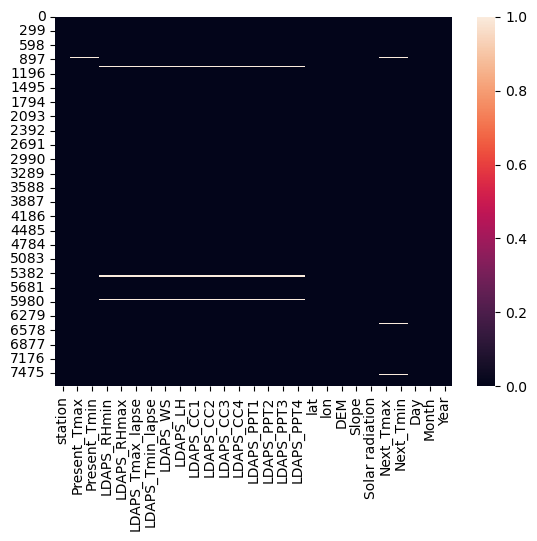

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

In [12]:
df=df.dropna()

Checking Count of null values in the dataset

In [13]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

Checking Correlation

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


<Axes: >

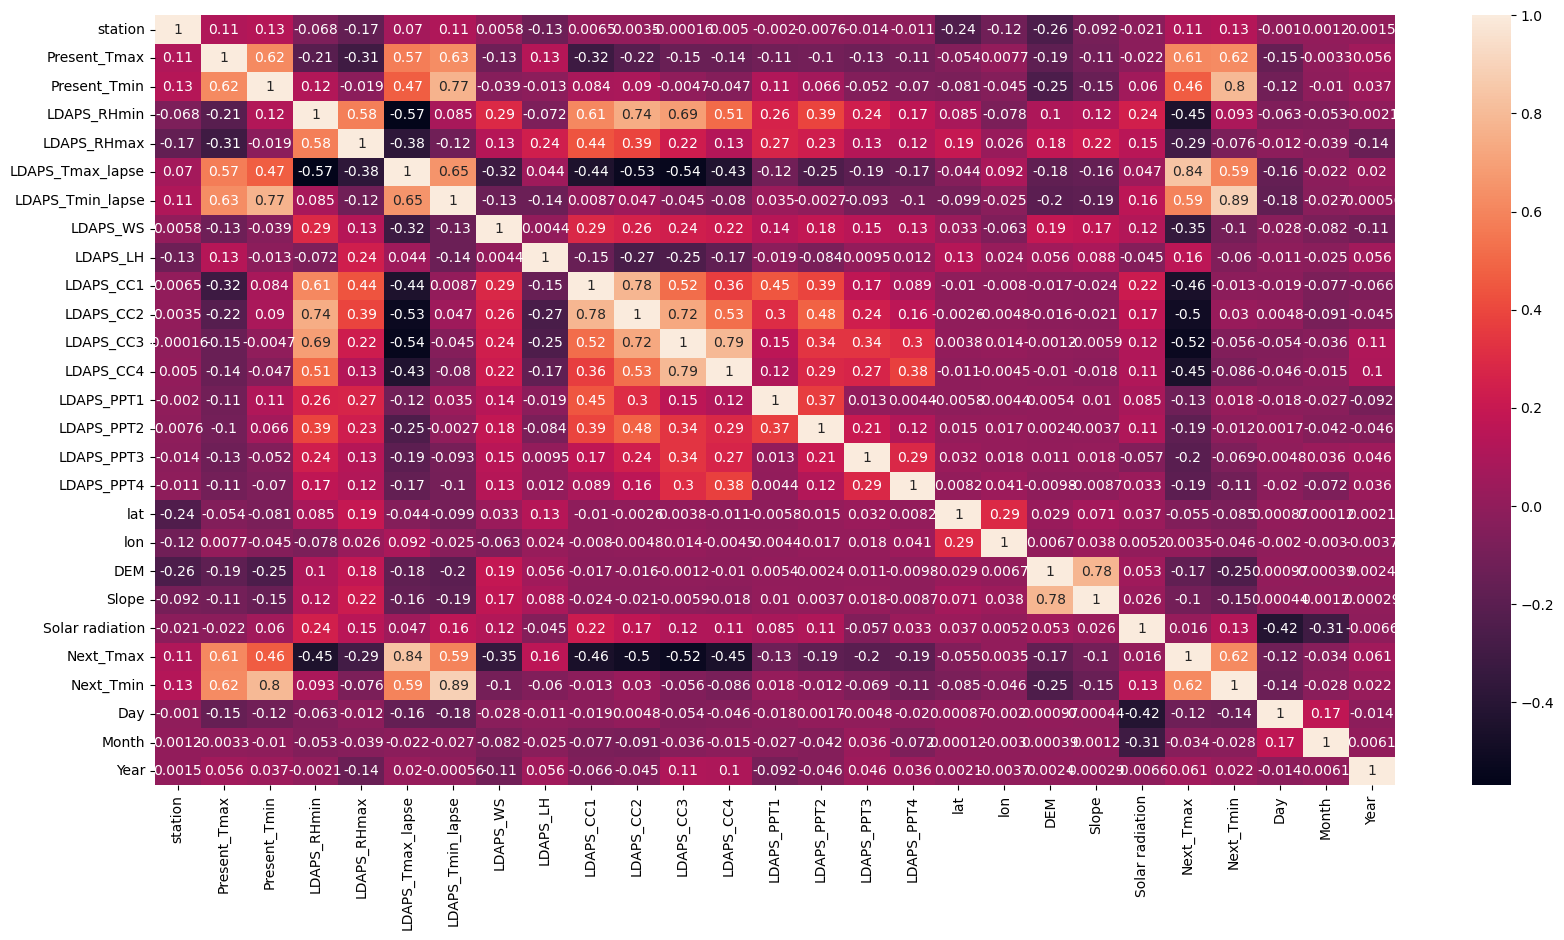

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

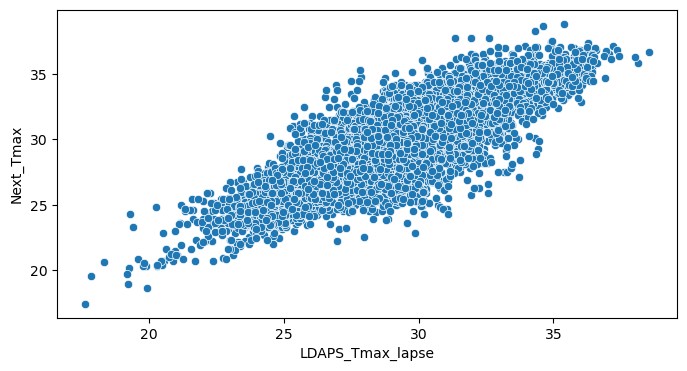

In [16]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

<Axes: xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

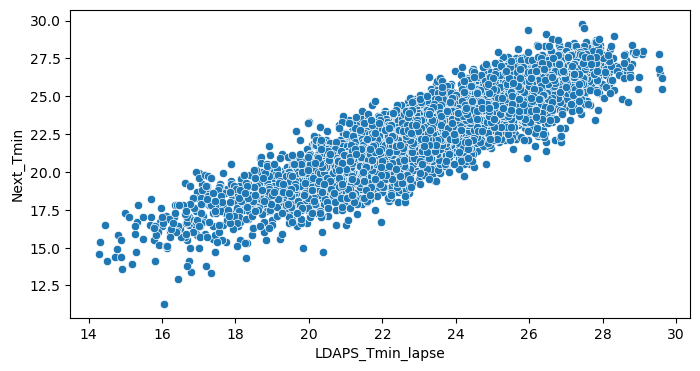

In [17]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df)

<Axes: xlabel='Present_Tmin', ylabel='Next_Tmin'>

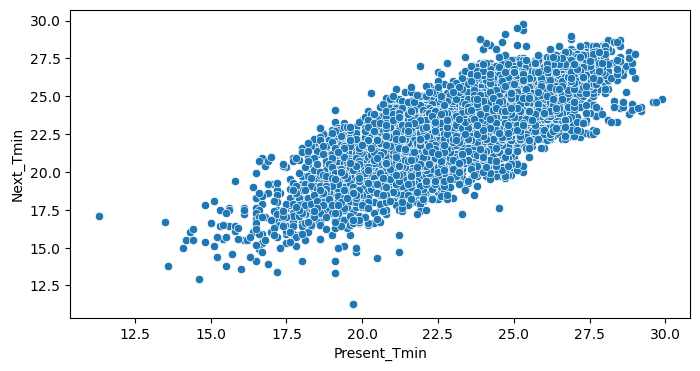

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)

<Axes: xlabel='Present_Tmax', ylabel='Next_Tmax'>

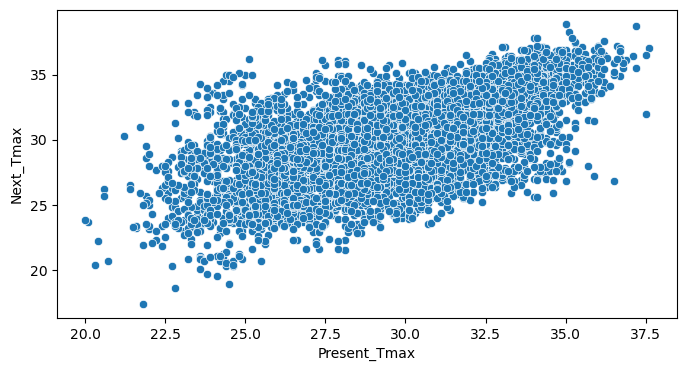

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)

<Axes: xlabel='Next_Tmax', ylabel='Density'>

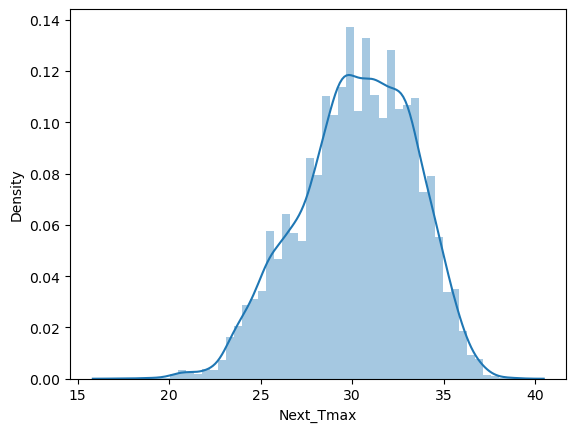

In [20]:
sns.distplot(df['Next_Tmax'])

<Axes: xlabel='Next_Tmin', ylabel='Density'>

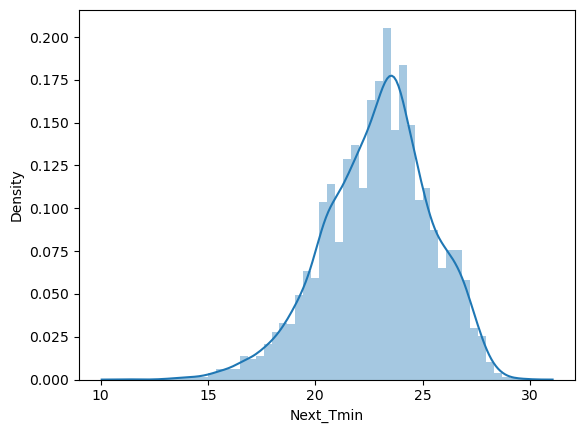

In [21]:
sns.distplot(df['Next_Tmin'])

Checking Skewness

array([[<Axes: title={'center': 'station'}>,
        <Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>,
        <Axes: title={'center': 'LDAPS_RHmax'}>],
       [<Axes: title={'center': 'LDAPS_Tmax_lapse'}>,
        <Axes: title={'center': 'LDAPS_Tmin_lapse'}>,
        <Axes: title={'center': 'LDAPS_WS'}>,
        <Axes: title={'center': 'LDAPS_LH'}>,
        <Axes: title={'center': 'LDAPS_CC1'}>],
       [<Axes: title={'center': 'LDAPS_CC2'}>,
        <Axes: title={'center': 'LDAPS_CC3'}>,
        <Axes: title={'center': 'LDAPS_CC4'}>,
        <Axes: title={'center': 'LDAPS_PPT1'}>,
        <Axes: title={'center': 'LDAPS_PPT2'}>],
       [<Axes: title={'center': 'LDAPS_PPT3'}>,
        <Axes: title={'center': 'LDAPS_PPT4'}>,
        <Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'DEM'}>],
       [<Axes: title={'center': 'Slope'}>,
        <Axes: 

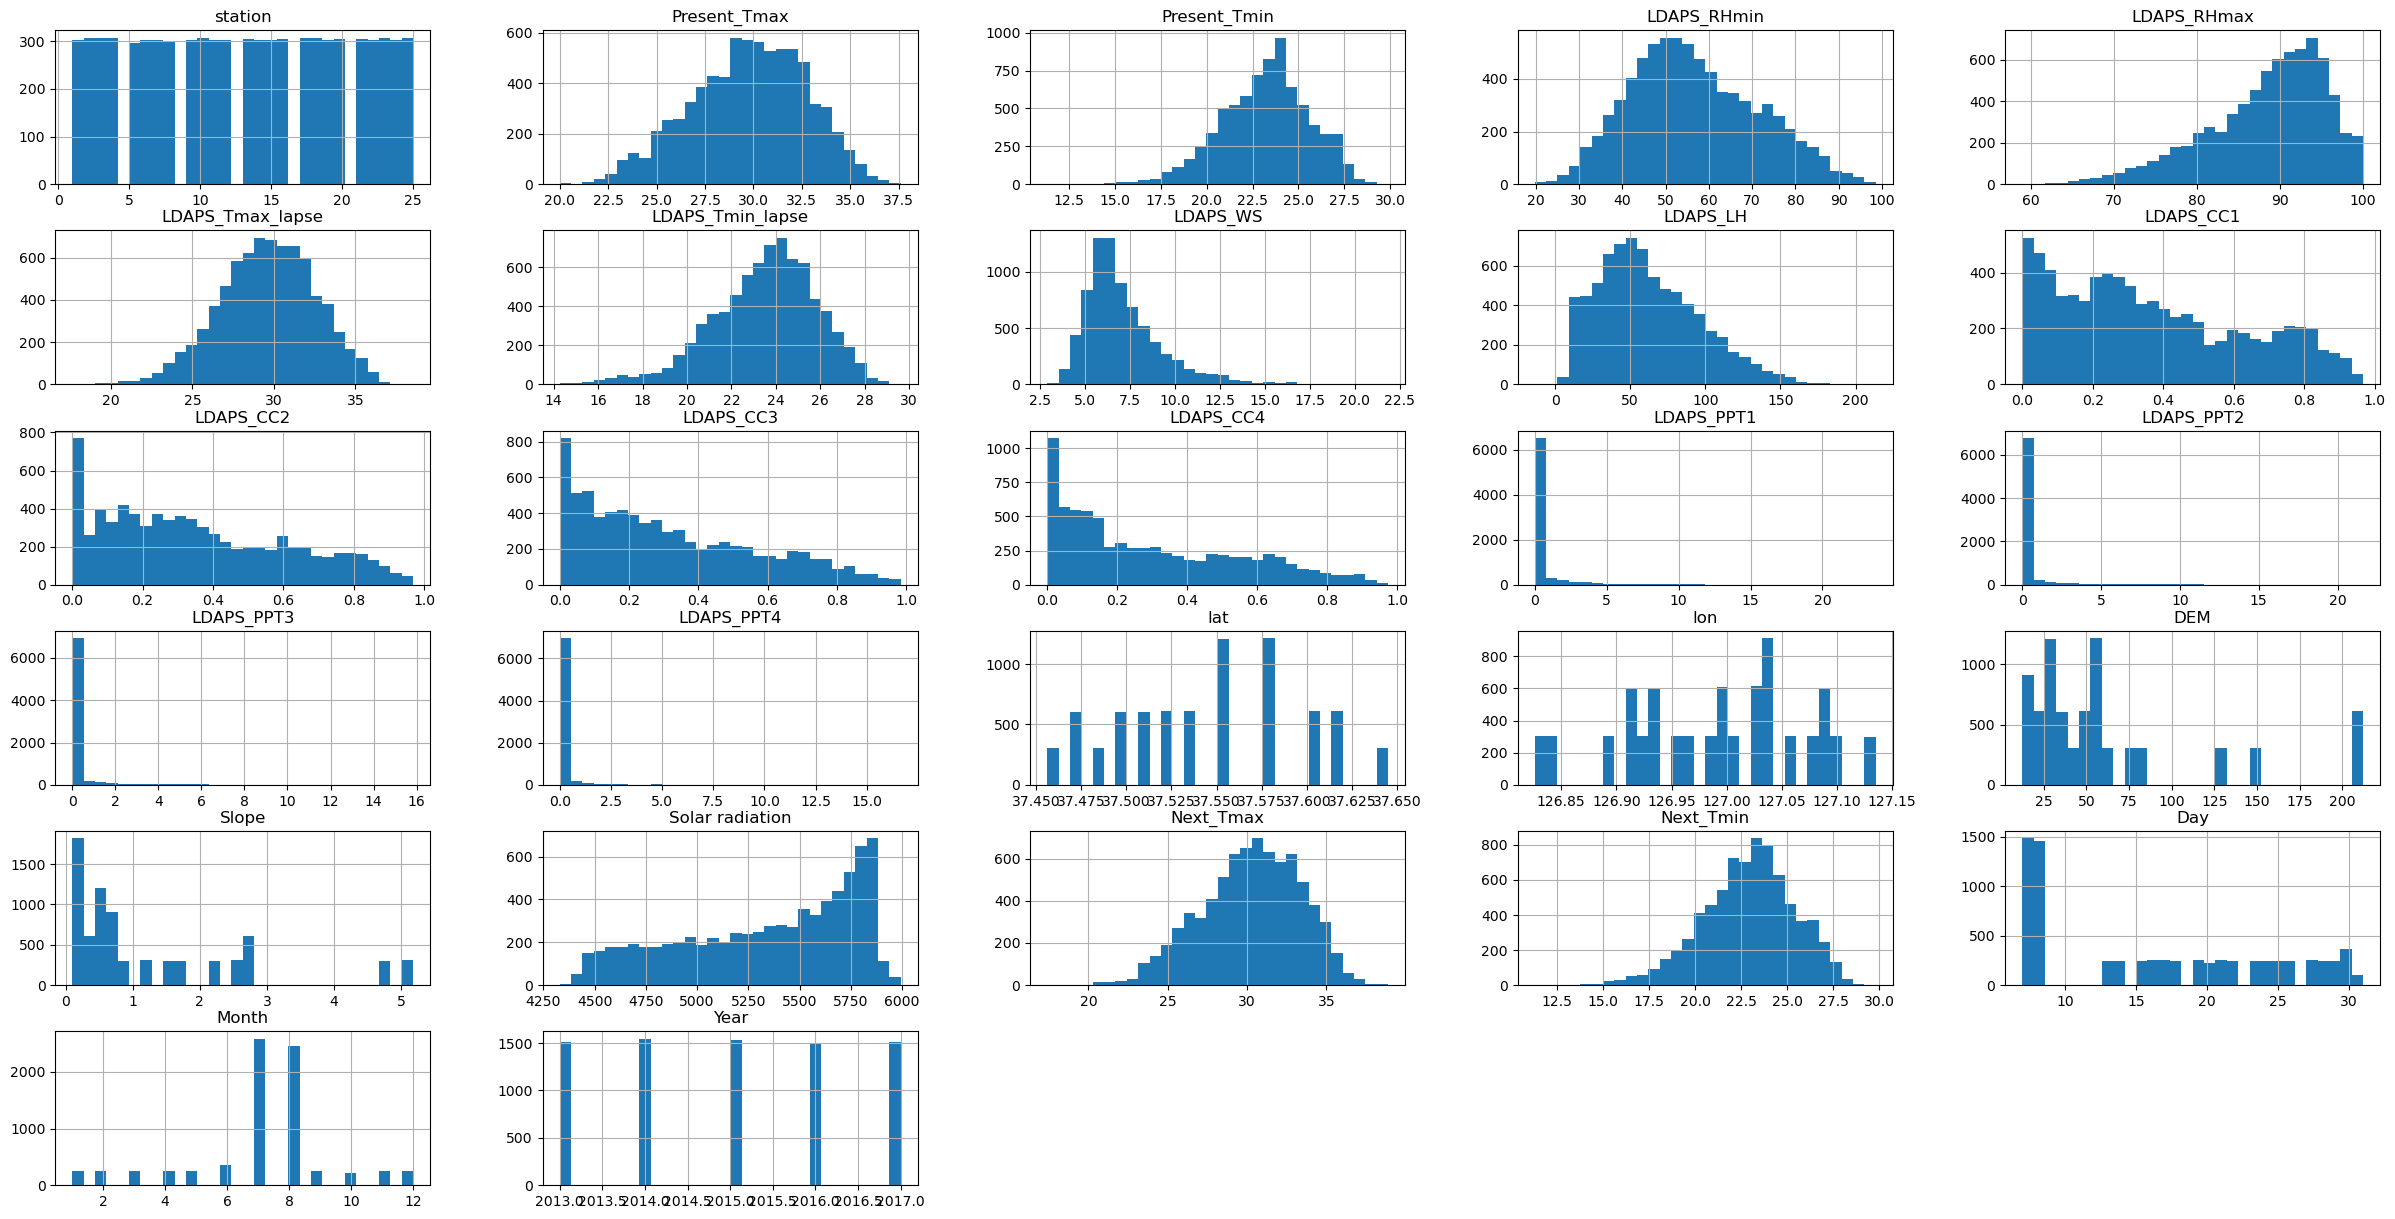

In [22]:
df.hist(bins=30,figsize=(30,15))

In [23]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

In [24]:
for i in df:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [26]:
df.skew()

station            -0.003389
Present_Tmax       -0.257320
Present_Tmin       -0.354380
LDAPS_RHmin         0.297992
LDAPS_RHmax        -0.846160
LDAPS_Tmax_lapse   -0.222931
LDAPS_Tmin_lapse   -0.574513
LDAPS_WS            0.679561
LDAPS_LH           -0.621184
LDAPS_CC1           0.456331
LDAPS_CC2           0.473898
LDAPS_CC3           0.388238
LDAPS_CC4           0.441978
LDAPS_PPT1          2.747363
LDAPS_PPT2          3.181427
LDAPS_PPT3          4.001074
LDAPS_PPT4          4.206547
lat                 0.085976
lon                -0.288809
DEM                 0.444516
Slope               0.834678
Solar radiation    -0.524129
Next_Tmax          -0.335629
Next_Tmin          -0.394365
Day                 0.244934
Month              -0.702970
Year                0.014184
dtype: float64

In [25]:
df=df.dropna()

Checking Outliers

station                Axes(0.125,0.747241;0.0824468x0.132759)
Present_Tmax        Axes(0.223936,0.747241;0.0824468x0.132759)
Present_Tmin        Axes(0.322872,0.747241;0.0824468x0.132759)
LDAPS_RHmin         Axes(0.421809,0.747241;0.0824468x0.132759)
LDAPS_RHmax         Axes(0.520745,0.747241;0.0824468x0.132759)
LDAPS_Tmax_lapse    Axes(0.619681,0.747241;0.0824468x0.132759)
LDAPS_Tmin_lapse    Axes(0.718617,0.747241;0.0824468x0.132759)
LDAPS_WS            Axes(0.817553,0.747241;0.0824468x0.132759)
LDAPS_LH               Axes(0.125,0.587931;0.0824468x0.132759)
LDAPS_CC1           Axes(0.223936,0.587931;0.0824468x0.132759)
LDAPS_CC2           Axes(0.322872,0.587931;0.0824468x0.132759)
LDAPS_CC3           Axes(0.421809,0.587931;0.0824468x0.132759)
LDAPS_CC4           Axes(0.520745,0.587931;0.0824468x0.132759)
LDAPS_PPT1          Axes(0.619681,0.587931;0.0824468x0.132759)
LDAPS_PPT2          Axes(0.718617,0.587931;0.0824468x0.132759)
LDAPS_PPT3          Axes(0.817553,0.587931;0.0824468x0.

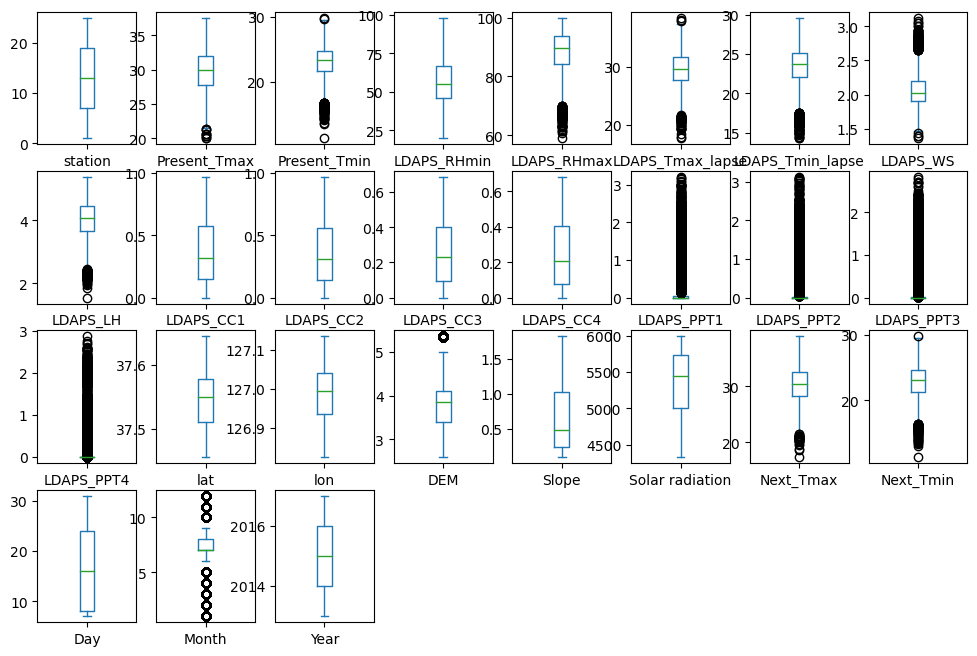

In [27]:
df.plot(kind='box',subplots=True,layout=(5,8),figsize=(12,10))

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','LDAPS_WS','LDAPS_LH','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_RHmax','Next_Tmax','Next_Tmin','Month','Present_Tmax','Present_Tmin']]))
z

,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,LDAPS_WS,LDAPS_LH,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_RHmax,Next_Tmax,Next_Tmin,Month,Present_Tmax,Present_Tmin
0,0.423584,0.375038,0.325322,0.305659,0.012849,0.437212,0.526053,0.215880,0.383530,0.367379,0.689530,0.47756,0.353813,0.748230
1,0.423584,0.375038,0.325322,0.305659,0.653920,0.034868,0.077731,0.223035,0.312435,0.082602,0.165809,0.47756,0.724819,0.664928
2,0.423584,0.375038,0.325322,0.305659,0.387980,1.517526,0.159502,0.449574,0.608980,0.275451,0.398200,0.47756,0.623697,0.043139
3,0.423584,0.375038,0.325322,0.305659,0.679753,0.347498,0.028092,0.079586,1.129335,0.468300,0.559345,0.47756,0.758526,0.084790
4,0.423584,0.375038,0.325322,0.305659,0.627469,1.157515,0.172659,0.011148,0.249963,0.307592,0.165809,0.47756,0.556283,0.539975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,0.423584,0.375038,0.325322,0.305659,0.128035,2.689005,0.614893,2.224122,1.402707,0.849502,2.099551,0.41507,2.241417,2.247665
7746,0.423584,0.375038,0.325322,0.305659,0.607289,0.710859,0.991383,2.432881,0.648382,0.720936,2.341268,0.41507,2.443661,2.414269
7747,0.423584,0.375038,0.325322,0.305659,0.381814,0.497216,1.111293,2.022328,1.318157,0.624511,1.938405,0.41507,2.174003,2.539222
7748,0.423584,0.375038,0.325322,0.305659,0.160904,0.188296,0.887629,2.040327,1.536992,0.528087,1.656401,0.41507,2.174003,2.289316


In [29]:
z=np.abs(zscore(df[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','LDAPS_WS','LDAPS_LH','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_RHmax','Next_Tmax','Next_Tmin','Month','Present_Tmax','Present_Tmin']]))
threshold=3
df1 = df[(z<3).all(axis = 1)]

In [30]:
df=df1.copy()
df.shape

(6566, 27)

In [31]:
df.sample(5)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
3349,25.0,30.7,22.3,40.083527,72.183319,33.922630,25.055961,2.001712,2.873614,0.494837,...,37.5237,126.970,3.024534,0.240040,5785.897949,34.0,23.8,7.0,9.0,2015.0
4955,6.0,30.2,22.8,51.288841,84.068848,29.372656,23.993095,2.023583,3.963291,0.466464,...,37.5102,127.042,4.018874,0.136016,5757.363281,30.3,23.8,7.0,12.0,2016.0
1759,10.0,28.4,21.7,47.590046,88.393806,33.145943,24.059685,1.923149,4.182705,0.514220,...,37.4562,126.955,5.344757,1.821027,5827.465332,32.4,23.2,7.0,8.0,2014.0
1805,6.0,33.2,25.9,35.719898,88.599548,31.460775,23.146023,2.289196,4.232322,0.103802,...,37.5102,127.042,4.018874,0.136016,5793.142578,33.6,23.3,7.0,10.0,2014.0
361,12.0,24.0,22.2,64.055496,95.388092,29.704538,23.121118,2.238664,3.478923,0.753359,...,37.5507,126.988,4.891236,0.465682,5794.267090,28.7,22.9,14.0,7.0,2013.0


Implementing ML(Next_Tmin)

In [32]:
x=df.drop(['Next_Tmin'],axis=1)
y=df['Next_Tmin']

In [33]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.052902,...,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.066461,...,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.030034,...,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035874,...,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,30.0,8.0,2017.0


In [34]:
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 6566, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4596, 26)
(1970, 26)
(4596,)
(1970,)


In [36]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [37]:
LR.coef_

array([-6.70928186e-03,  2.85093143e-02,  1.95004411e-01,  1.71620625e-02,
        7.92953814e-03, -1.99200861e-02,  5.88131866e-01,  9.42402759e-01,
        1.59370597e-02,  1.80160021e-03,  5.81736842e-01, -2.04126747e-02,
        3.91560146e-01, -2.60507845e-01, -3.81100213e-01,  4.39918426e-02,
       -5.70412570e-01, -1.25963451e+00,  6.07913185e-01, -5.87803002e-01,
        4.78381759e-01,  1.22599411e-05,  2.19208420e-01,  1.17745789e-02,
       -8.73970724e-03,  1.36157509e-02])

In [38]:
LR.intercept_

-61.64888960056168

In [39]:
LR.score(x_train,y_train)

0.845665786357828

In [40]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [20.95831715 24.84713731 23.77821903 ... 20.73599515 25.53467071
 21.84763324]
Actual value 3045    20.8
6974    24.3
5479    23.5
3778    24.8
6077    17.7
        ... 
2936    22.1
5197    26.6
2540    20.9
3981    26.0
7401    22.1
Name: Next_Tmin, Length: 1970, dtype: float64


In [41]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))
print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 0.8712225672393747
Mean Absolute Error: 0.7338345408543118
Root Mean Squared Error: 0.9333930400637102
R2 Score: 0.834850964186152


The model has an Root Mean Squared Error score of ~0.93. This implies that lower is the RMSE score, therefore model is performing better at making predictions.



In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5252, 26)
(1314, 26)
(5252,)
(1314,)


In [43]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
RFR.score(x_train,y_train)

0.9871282365981523

In [45]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [20.976 24.461 23.505 ... 23.898 21.252 26.   ]
Actual value 3045    20.8
6974    24.3
5479    23.5
3778    24.8
6077    17.7
        ... 
4930    22.8
5677    26.0
6529    24.2
7315    20.9
7163    25.5
Name: Next_Tmin, Length: 1314, dtype: float64


In [46]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))
print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 0.5252822343987824
Mean Absolute Error: 0.5599802130898023
Root Mean Squared Error: 0.7247635713795102
R2 Score: 0.8993620659634854


The model has an Root Mean Squared Error score of ~0.72. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

Implementing ML(Next_Tmax)

In [48]:
x=df.drop(['Next_Tmax'],axis=1)
y=df['Next_Tmax']

In [49]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.052902,...,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.066461,...,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.030034,...,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035874,...,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,18.8,30.0,8.0,2017.0


In [50]:
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 6566, dtype: float64

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4596, 26)
(1970, 26)
(4596,)
(1970,)


In [52]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
DTR.score(x_train,y_train)

1.0

In [54]:
DTRpred=DTR.predict(x_test)
print("Predicted value", DTRpred)
print("Actual value", y_test)

Predicted value [31.1 27.5 33.8 ... 30.  32.5 29.3]
Actual value 3045    30.5
6974    28.4
5479    33.8
3778    32.7
6077    28.8
        ... 
2936    27.5
5197    34.3
2540    30.6
3981    31.9
7401    29.0
Name: Next_Tmax, Length: 1970, dtype: float64


In [55]:
print('Mean Squared Error:', MSE(y_test, DTRpred))
print('Mean Absolute Error:', MAE(y_test, DTRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, DTRpred)))
print('R2 Score:', r2_score(y_test, DTRpred))

Mean Squared Error: 1.9769644670050757
Mean Absolute Error: 1.0093401015228425
Root Mean Squared Error: 1.406045684536984
R2 Score: 0.7627686877374535


The model has an Root Mean Squared Error score of ~1.40. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5252, 26)
(1314, 26)
(5252,)
(1314,)


In [57]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
KNR.score(x_train,y_train)

0.7692837678880999

In [59]:
KNRpred=KNR.predict(x_test)
print("Predicted value", KNRpred)
print("Actual value", y_test)

Predicted value [29.1  32.74 32.52 ... 31.68 29.14 33.24]
Actual value 3045    30.5
6974    28.4
5479    33.8
3778    32.7
6077    28.8
        ... 
4930    31.0
5677    37.0
6529    33.4
7315    25.4
7163    31.6
Name: Next_Tmax, Length: 1314, dtype: float64


In [60]:
print('Mean Squared Error:', MSE(y_test, KNRpred))
print('Mean Absolute Error:', MAE(y_test, KNRpred))
print('Root Mean Squared Error:', np.sqrt(MSE(y_test, KNRpred)))
print('R2 Score:', r2_score(y_test, KNRpred))

Mean Squared Error: 2.8685646879756463
Mean Absolute Error: 1.2765144596651445
Root Mean Squared Error: 1.6936837626828825
R2 Score: 0.65802271314328


The model has an Root Mean Squared Error score of ~1.69. This implies that lower is the RMSE score, therefore model is performing better at making predictions.